In [1]:
import numpy as np
import pandas as pd
from google.colab import files
files.upload()

Saving insurance.csv to insurance.csv


{'insurance.csv': b'age,sex,bmi,children,smoker,region,charges\r\n19,female,27.9,0,yes,southwest,16884.924\r\n18,male,33.77,1,no,southeast,1725.5523\r\n28,male,33,3,no,southeast,4449.462\r\n33,male,22.705,0,no,northwest,21984.47061\r\n32,male,28.88,0,no,northwest,3866.8552\r\n31,female,25.74,0,no,southeast,3756.6216\r\n46,female,33.44,1,no,southeast,8240.5896\r\n37,female,27.74,3,no,northwest,7281.5056\r\n37,male,29.83,2,no,northeast,6406.4107\r\n60,female,25.84,0,no,northwest,28923.13692\r\n25,male,26.22,0,no,northeast,2721.3208\r\n62,female,26.29,0,yes,southeast,27808.7251\r\n23,male,34.4,0,no,southwest,1826.843\r\n56,female,39.82,0,no,southeast,11090.7178\r\n27,male,42.13,0,yes,southeast,39611.7577\r\n19,male,24.6,1,no,southwest,1837.237\r\n52,female,30.78,1,no,northeast,10797.3362\r\n23,male,23.845,0,no,northeast,2395.17155\r\n56,male,40.3,0,no,southwest,10602.385\r\n30,male,35.3,0,yes,southwest,36837.467\r\n60,female,36.005,0,no,northeast,13228.84695\r\n30,female,32.4,1,no,southwe

In [2]:
df=pd.read_csv('/content/insurance.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [3]:
df['sex'].replace({'female':1,'male':0},inplace=True)
df['smoker'].replace({'yes':1,'no':0},inplace=True)
df

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,southwest,16884.92400
1,18,0,33.770,1,0,southeast,1725.55230
2,28,0,33.000,3,0,southeast,4449.46200
3,33,0,22.705,0,0,northwest,21984.47061
4,32,0,28.880,0,0,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,0,30.970,3,0,northwest,10600.54830
1334,18,1,31.920,0,0,northeast,2205.98080
1335,18,1,36.850,0,0,southeast,1629.83350
1336,21,1,25.800,0,0,southwest,2007.94500


In [4]:
df['region'].value_counts

<bound method IndexOpsMixin.value_counts of 0       southwest
1       southeast
2       southeast
3       northwest
4       northwest
          ...    
1333    northwest
1334    northeast
1335    southeast
1336    southwest
1337    northwest
Name: region, Length: 1338, dtype: object>

In [5]:
df['region'].describe()

count          1338
unique            4
top       southeast
freq            364
Name: region, dtype: object

In [6]:
df['region'].sample()

80    northeast
Name: region, dtype: object

In [7]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
dfle = df
dfle.region = le.fit_transform(dfle.region)
dfle

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,3,16884.92400
1,18,0,33.770,1,0,2,1725.55230
2,28,0,33.000,3,0,2,4449.46200
3,33,0,22.705,0,0,1,21984.47061
4,32,0,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,0,30.970,3,0,1,10600.54830
1334,18,1,31.920,0,0,0,2205.98080
1335,18,1,36.850,0,0,2,1629.83350
1336,21,1,25.800,0,0,3,2007.94500


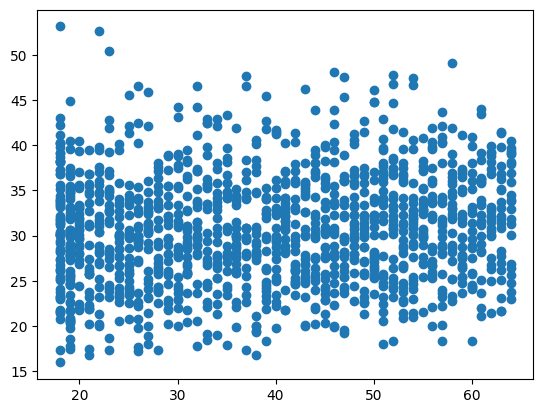

In [9]:
import matplotlib.pyplot as plt
plt.scatter(df.age,df.bmi)
plt.show()

In [10]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

scaler.fit(df[['age']])
df['age'] = scaler.transform(df[['age']])

scaler.fit(df[['bmi']])
df['bmi'] = scaler.transform(df[['bmi']])
scaler.fit(df[['charges']])
df['charges'] = scaler.transform(df[['charges']])
df

,age,sex,bmi,children,smoker,region,charges
0,0.021739,1,0.321227,0,1,3,0.251611
1,0.000000,0,0.479150,1,0,2,0.009636
2,0.217391,0,0.458434,3,0,2,0.053115
3,0.326087,0,0.181464,0,0,1,0.333010
4,0.304348,0,0.347592,0,0,1,0.043816
...,...,...,...,...,...,...,...
1333,0.695652,0,0.403820,3,0,1,0.151299
1334,0.000000,1,0.429379,0,0,0,0.017305
1335,0.000000,1,0.562012,0,0,2,0.008108
1336,0.065217,1,0.264730,0,0,3,0.014144


In [19]:
import numpy as np
from sklearn.cluster import KMeans
km=KMeans(n_clusters=5)
y_predicted = km.fit_predict(df[['age','bmi']])
y_predicted

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([2, 4, 4, ..., 4, 2, 1], dtype=int32)

In [20]:
df['cluster']=y_predicted
df

,age,sex,bmi,children,smoker,region,charges,cluster
0,0.021739,1,0.321227,0,1,3,0.251611,2
1,0.000000,0,0.479150,1,0,2,0.009636,4
2,0.217391,0,0.458434,3,0,2,0.053115,4
3,0.326087,0,0.181464,0,0,1,0.333010,0
4,0.304348,0,0.347592,0,0,1,0.043816,0
...,...,...,...,...,...,...,...,...
1333,0.695652,0,0.403820,3,0,1,0.151299,1
1334,0.000000,1,0.429379,0,0,0,0.017305,2
1335,0.000000,1,0.562012,0,0,2,0.008108,4
1336,0.065217,1,0.264730,0,0,3,0.014144,2


In [21]:
df1=df[df['cluster']==1]
df2=df[df['cluster']==2]
df3=df[df['cluster']==3]
df4=df[df['cluster']==4]




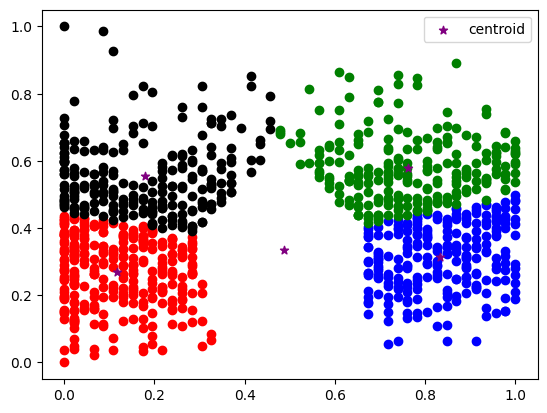

In [22]:
plt.scatter(df1.age,df1.bmi,color='blue')
plt.scatter(df2.age,df2.bmi,color='red')
plt.scatter(df3.age,df3.bmi,color='green')
plt.scatter(df4.age,df4.bmi,color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.legend()